In [3]:
#Clipping a raster with a shapefile
import geopandas as gpd
import os
import rasterio as rio
from rasterio.mask import mask as rmask


roi = r"G:\Manjar\github\boundary\delhi.shp"
raster_path = r"G:\Manjar\github\rasterData\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B1.TIF"
# composite_path = r"/home/tommy/12_Days_GeoPython_Training/Day_9/rasters/Band_1.tif"

clipped_path = os.path.join(r"G:\Manjar\github\rasterData\delhi_clip.tif")

gdf = gpd.read_file(roi)


with rio.open(raster_path) as src:
    shapes = gdf.geometry

    cropped_image, cropped_image_transform = rmask(src, shapes, crop=True)

    out_meta = src.meta.copy()
    out_meta.update({
        "height": cropped_image.shape[1],
        "width": cropped_image.shape[2],
        "transform": cropped_image_transform
    })

    # Save the cropped file
    with rio.open(clipped_path, "w", **out_meta) as dst:
        dst.write(cropped_image)
        # dst.write(cropped_image[i - 1], i)

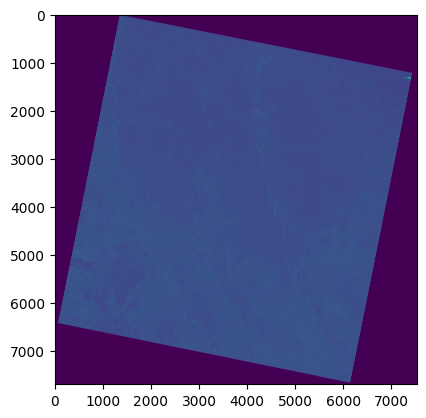

<Axes: >

In [5]:
from rasterio.plot import show

with rio.open(raster_path) as src:
    band = src.read(1)

show(band)

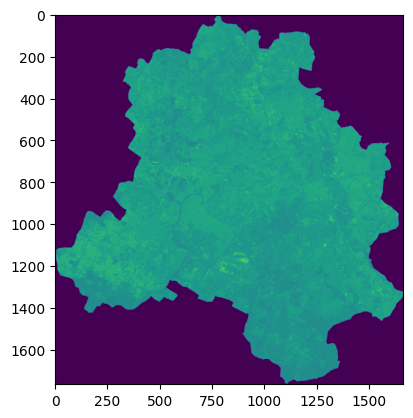

<Axes: >

In [6]:
from rasterio.plot import show

with rio.open(clipped_path) as src:
    band = src.read(1)

show(band)